In [14]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

In [7]:
infestation_history = pd.read_excel(r'data_raw/ML_BDR_20201019.xlsx')

In [8]:
infestation_history

,LK,LK-Nr,LK-Rev,REVUFBADR,Jahr,ZR,Eigentumsgruppe,Zugang,Abgang
0,BZ,25,1,2501,2007,06 Juni,SW,5.0,0.0
1,BZ,25,1,2501,2007,08 August,SW,12.0,12.0
2,BZ,25,1,2501,2007,10 Oktober-Dezember,SW,2.0,0.0
3,BZ,25,1,2501,2008,04 April,SW,1.0,0.0
4,BZ,25,1,2501,2008,06 Juni,SW,2.0,0.0
...,...,...,...,...,...,...,...,...,...
8046,Z,24,2,2402,2020,07 Juli,SW,0.0,6.0
8047,Z,24,2,2402,2020,08 August,NSW,4278.0,4408.0
8048,Z,24,2,2402,2020,08 August,SW,70.0,70.0
8049,Z,24,2,2402,2020,09 September,NSW,3115.0,4249.0


In [11]:
data = gpd.read_file(r'data_raw/shape/ufb_rev_vorUmstrukturierungen_.shp', encoding='utf-8')

In [12]:
data

,KREIS_NAME,REVUFB_NM,REVUFBADR,geometry
0,Meißen,Nord,2703,"POLYGON ((418952.942 5692288.782, 418909.147 5..."
1,Meißen,West,2701,"POLYGON ((389635.997 5699901.234, 389648.747 5..."
2,Meißen,Süd,2702,"POLYGON ((378695.051 5678837.912, 378676.082 5..."
3,Erzgebirgskreis,Annaberg,2105,"MULTIPOLYGON (((366499.454 5606840.063, 366468..."
4,Erzgebirgskreis,Eibenstock,2101,"POLYGON ((333355.788 5609845.954, 333373.979 5..."
5,Erzgebirgskreis,Marienberg,2107,"MULTIPOLYGON (((365501.494 5603373.838, 365437..."
6,Erzgebirgskreis,Olbernhau,2108,"POLYGON ((384970.662 5622586.828, 384985.114 5..."
7,Erzgebirgskreis,Schwarzenberg,2102,"MULTIPOLYGON (((347835.985 5595655.110, 347811..."
8,Erzgebirgskreis,Stollberg,2104,"POLYGON ((349016.644 5629140.011, 349041.546 5..."
9,Erzgebirgskreis,Zschopau,2106,"MULTIPOLYGON (((360418.139 5625401.415, 360401..."


In [16]:
data['coords'] = data['geometry'].apply(lambda x: x.representative_point().coords[:])
data['coords'] = [coords[0] for coords in data['coords']]

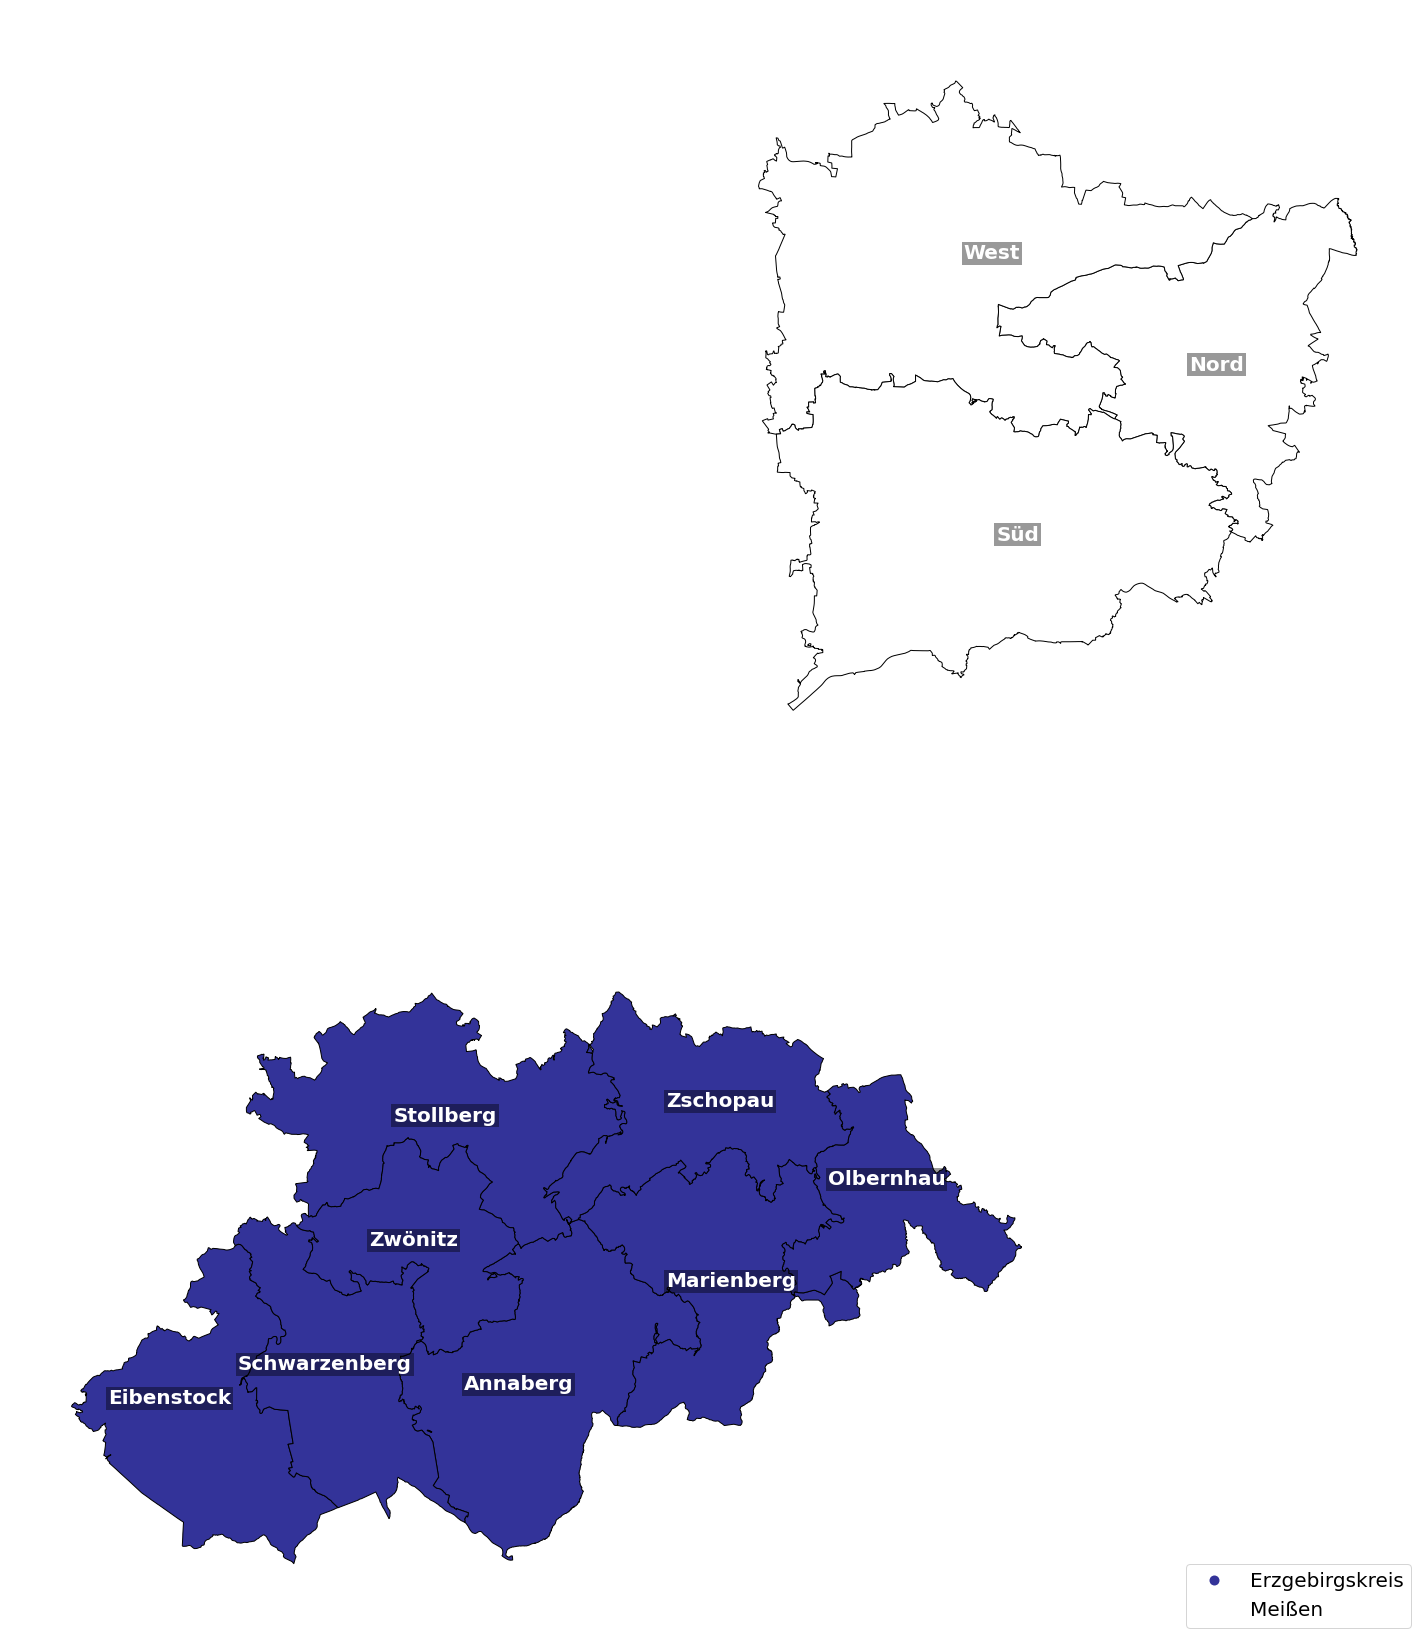

In [17]:
fig, ax = plt.subplots(figsize=(30,30))
data.plot(ax=ax, column='KREIS_NAME', legend=True,
          edgecolor='black', linewidth=1, 
          cmap='terrain', legend_kwds={'fontsize': 20, 'loc': 'lower right'})

for idx, row in data.iterrows():
    ax.text(row.coords[0], row.coords[1], color='white', weight = 'bold', fontsize=20,
            s=row['REVUFB_NM'], horizontalalignment='center', 
            bbox={'facecolor': 'black', 'alpha':0.4, 'pad': 2, 'edgecolor':'none'})
    

plt.axis('off');